In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
nifty = yf.download("^NSEI", start="2019-01-01", end="2024-12-31")
nifty = nifty.dropna()

/tmp/ipython-input-467847715.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [24]:
# Calculate Daily Log Returns
nifty['LogReturn'] = np.log(nifty['Close'] / nifty['Close'].shift(1))
nifty_log = nifty.dropna()

In [25]:
# Define Market Regimes
def classify_regime(r):
    if r > 0.005:        # > +0.5%
        return 'Bull'
    elif r < -0.005:     # < -0.5%
        return 'Bear'
    else:
        return 'Sideways'
nifty_r = pd.DataFrame()
nifty_r['Regime'] = nifty_log['LogReturn'].apply(classify_regime)

In [26]:
# Plot regime-colored prices
colors = {'Bull': 'green', 'Bear': 'red', 'Sideways': 'gray'}
shapes = {'Bull': '^', 'Bear': 'v', 'Sideways': '.'}
sizes  = {'Bull': 4, 'Bear': 4, 'Sideways': 4}

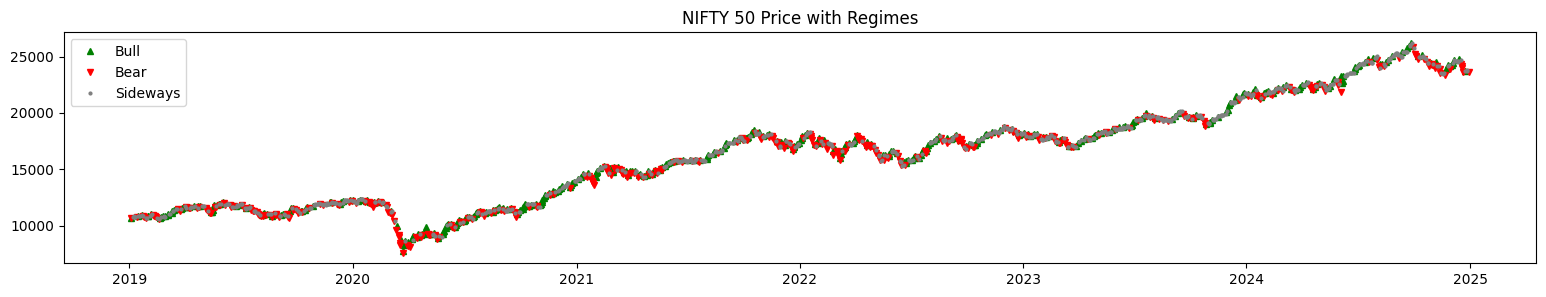

In [27]:
plt.figure(figsize=(19,3))
for regime in ['Bull', 'Bear', 'Sideways']:
    x = nifty_r[nifty_r['Regime'] == regime].index
    y = nifty.loc[x]["Close"]
    plt.plot(x, y, marker=shapes[regime], markersize=sizes[regime],linestyle = 'None', label=regime, color=colors[regime])
plt.title("NIFTY 50 Price with Regimes")
plt.legend()